In [1]:
from opensnds.constants import *
from opensnds.app.constants import DEFAULT_PALETTE
from opensnds.app.utils.back_utils import query_table, load_datasets, get_group_histogram, get_time_barplot
from opensnds.preprocessing.schema_handler import load_schemas
from opensnds.config import SUPPORTED_DBS
from opensnds.preprocessing.schema_handler import *
import databricks.koalas as ks
pd.set_option('display.max_columns', 500)
#from opensnds.utils import sc
%load_ext autoreload 
%autoreload 2

{'openlpp': [{'label': '2014', 'value': 2014}, {'label': '2015', 'value': 2015}, {'label': '2016', 'value': 2016}, {'label': '2017', 'value': 2017}, {'label': '2018', 'value': 2018}, {'label': '2019', 'value': 2019}]}


In [3]:
DEBUG = True
datasets = load_datasets()
schemas = load_schemas()

In [5]:
ds_name = "openlpp"

datasets["openlpp__code_lpp"].head()

CODE_LPP                     L_CODE_LPP  AGE  SEXE  BEN_REG  PSP_SPE   NBC        REM        BSE    QTE  year
0      3518  APPAREIL GENERATEUR D AEROSOL    0     1        5        1  3770  110476.79  179379.31  10216  2019
1      3518  APPAREIL GENERATEUR D AEROSOL    0     1        5       11    25     900.59    1501.02     52  2019
2      3518  APPAREIL GENERATEUR D AEROSOL    0     1        5       12   849   34841.95   56907.95   2515  2019
3      3518  APPAREIL GENERATEUR D AEROSOL    0     1        5       13   241    9025.25   14475.54    787  2019
4      3518  APPAREIL GENERATEUR D AEROSOL    0     1        5       90   365   56716.72   66189.78   1855  2019

In [8]:
filter_col = "CODE_LPP"
sub_db_name = ds_name
filter_values = ["3518"]
years = "2019"
if SUPPORTED_DBS[ds_name]['consommants']:
        sub_db_name = sub_db_name + '__' + filter_col.lower()
payload = {
        "ds_name": ds_name,
        "ds_schema": schemas[ds_name],
        "dataset": datasets[sub_db_name],
        "filter_col": filter_col,
        "filter_values": filter_values,
        "years": years
    }
payload["group_cols"] = SUPPORTED_DBS[ds_name]["focused_dimensions"]["sex"]

df = query_table(**payload)
fig, data = get_group_histogram(**payload)
print(data)
fig

   Nb actes  Montant remboursé  Nb patients          SEX_LIB
2   1394758        24491776.14       401003          FEMININ
0   1258864        24075571.61       332625         MASCULIN
1      1825           33550.35          446  VALEUR INCONNUE


In [12]:
payload["group_cols"] = SUPPORTED_DBS[ds_name]["frequency"][0]
df = query_table(**payload)
fig, data = get_time_barplot(**payload)
print(data)
fig

   Nb actes  Montant remboursé  year  Nb patients
3   2655447        48600898.10  2019       734074
0   3111003        55429564.18  2018       977848
2   3182066        54431247.10  2014      1036026
1   3464124        58304466.72  2015      1148187
5   3558358        59989174.58  2017      1148907
4   3635861        60074600.33  2016      1172001


   Nb actes  Montant remboursé  AGE_BEN_LIB
0      1744           11377.58     0-19 ANS
1     15639          112095.37  20 - 39 ANS
2     67179          524675.49  40 - 59 ANS
3    346832         2749469.12  60 ANS ET +
4       458            3402.63  AGE INCONNU


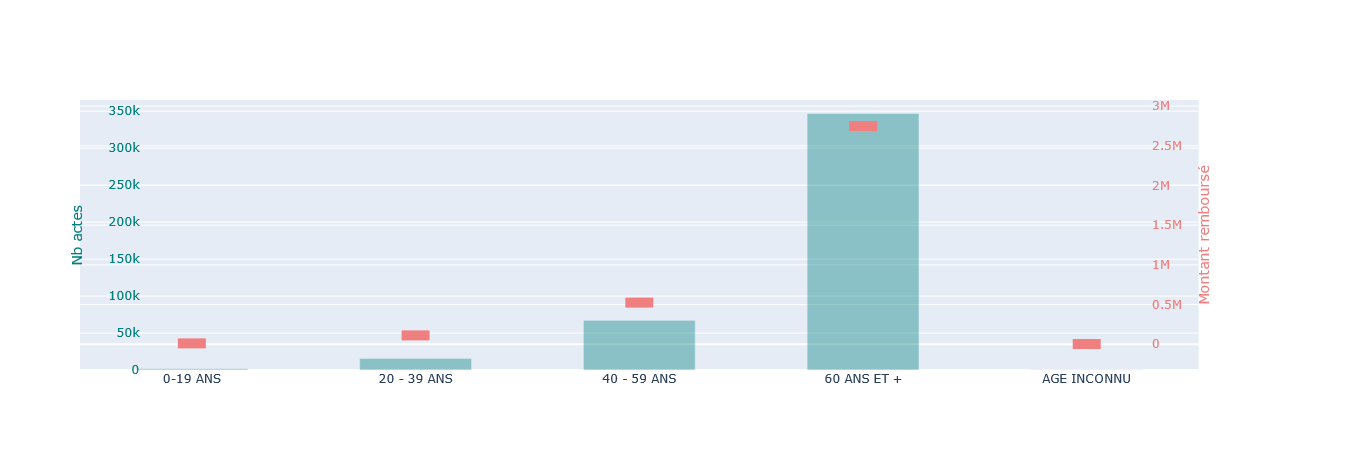

In [9]:
payload = {
    "ds_name": ds_name,
    "ds_schema": schemas[ds_name],
    "dataset": datasets[ds_name],
    "group_cols": "AGE",
    "filter_col": "ACTE",
    "filter_values": [186], 
    #"years": None
}
df = query_table(**payload)

fig, data = get_group_histogram(**payload)
print(data)
fig

In [35]:
payload = {
    "ds_name": ds_name,
    "ds_schema": schemas[ds_name],
    "dataset": datasets[ds_name],
    "group_cols": "BEN_REG",
    "filter_col": "ACTE",
    "filter_values": [186], 
    "years": [2018]
}
df = query_table(**payload)

#tt = get_group_histogram(**payload)
#tt
df

TypeError: only list-like objects are allowed to be passed to isin(), you passed a [int]

In [45]:
df["year"]

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
99995    2017
99996    2017
99997    2017
99998    2017
99999    2017
Name: year, Length: 100000, dtype: int64

In [48]:
years = [2016]
years = ["'"+str(y)+"'" for y in years]
df = datasets["openbio"]
df.query("{frequency_col} in ({years})".format(
    frequency_col="year",
    years=", ".join(years)
))

GRP  ACTE  AGE  SEXE  BEN_REG  PSP_SPE   DNB       REM       BSE  year
44213   90     4   40     1       11        1    62   1403.40   1668.00  2016
44214   90     4   40     1       99        8    19    505.00    505.00  2016
44215   90     4   20     2       24        7   190   3178.20   5112.00  2016
44216   90     4   40     1       44        8    47   1250.80   1267.00  2016
44217   90     4   40     2       11        4   153   3751.00   4105.00  2016
...    ...   ...  ...   ...      ...      ...   ...       ...       ...   ...
87850   90   461   20     2       11       99    13    154.98    245.70  2016
87851   15   462   20     2       84        4   851   8016.93  12565.88  2016
87852   15   462   20     2       84        3    64    584.10    943.80  2016
87853   15   462   20     2       84        2    14    143.55    204.60  2016
87854   15   462   20     2       84        1  4664  42609.20  68871.34  2016

[43642 rows x 10 columns]

In [32]:
df = query_table(**payload)
df

Empty DataFrame
Columns: [Nb actes, Montant remboursé, BEN_RES_LIB]
Index: []